In [3]:
!pip install matplotlib matplotlib-venn pandas



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import sys
!"{sys.executable}" -m pip install --upgrade pip
!"{sys.executable}" -m pip install pandas matplotlib matplotlib-venn



  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
  Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached matplotlib_venn-1.1.2-py3-none-any.whl
  Using cached numpy-2.3.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp312-cp312-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp312-cp312-win_amd64.whl.metada

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [10]:
df = pd.read_csv("../data/insomnia_cohort.csv")
print("Cohort loaded:", df.shape)
print(df.head())

print("Number of insomnia_flag")
print(df['insomnia_flag'].value_counts(dropna=False))

print("\nAverage age by insomnia status:")
print(df.groupby('insomnia_flag')['anchor_age'].mean())

print("\nGender breakdown:")
print(df.groupby(['insomnia_flag', 'gender']).size().unstack(fill_value=0))


Cohort loaded: (364627, 7)
   subject_id gender  anchor_age  rulea  ruleb  rulec  insomnia_flag
0    10000032      F          52    0.0    1.0    1.0            1.0
1    10000048      F          23    NaN    NaN    NaN            NaN
2    10000058      F          33    NaN    NaN    NaN            NaN
3    10000068      F          19    NaN    NaN    NaN            NaN
4    10000084      M          72    0.0    0.0    1.0            1.0
Number of insomnia_flag
insomnia_flag
NaN    306065
1.0     58562
Name: count, dtype: int64

Average age by insomnia status:
insomnia_flag
1.0    61.388597
Name: anchor_age, dtype: float64

Gender breakdown:
gender             F      M
insomnia_flag              
1.0            28983  29579


We now draw some plots to visualize cohort distribution.

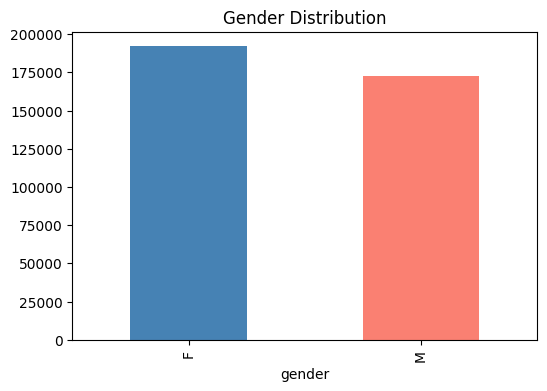

In [11]:

# Simple demographics plots
plt.figure(figsize=(6,4))
df['gender'].value_counts().plot(kind='bar', color=['steelblue','salmon'])
plt.title("Gender Distribution")
plt.show()

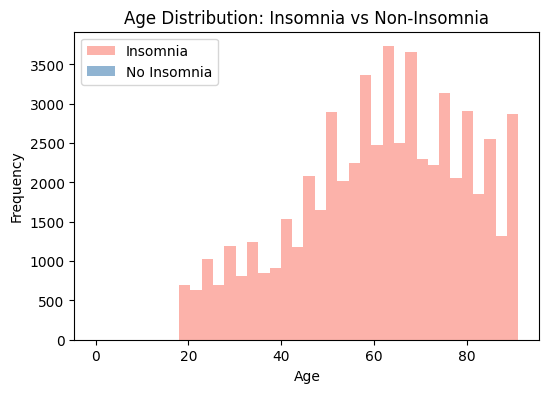

In [12]:
#Simple age distribution

plt.figure(figsize=(6,4))
df[df['insomnia_flag']==1]['anchor_age'].plot(kind='hist', bins=30, alpha=0.6, color='salmon', label='Insomnia')
df[df['insomnia_flag']==0]['anchor_age'].plot(kind='hist', bins=30, alpha=0.6, color='steelblue', label='No Insomnia')
plt.title("Age Distribution: Insomnia vs Non-Insomnia")
plt.legend()
plt.xlabel("Age")
plt.show()

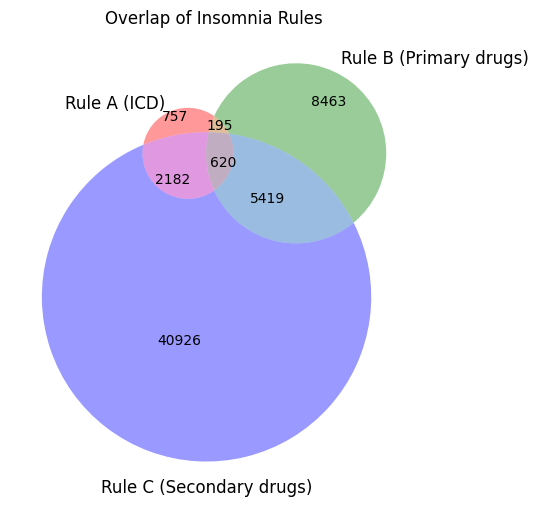

In [14]:
# Rule overlap visualization (A, B, C)
ruleA = set(df[df['rulea'] == 1]['subject_id'])
ruleB = set(df[df['ruleb'] == 1]['subject_id'])
ruleC = set(df[df['rulec'] == 1]['subject_id'])

plt.figure(figsize=(6,6))
venn3(
    subsets=(ruleA, ruleB, ruleC),
    set_labels=('Rule A (ICD)', 'Rule B (Primary drugs)', 'Rule C (Secondary drugs)')
)
plt.title("Overlap of Insomnia Rules")
plt.show()